In [1]:
import pandas as pd
import numpy as np

#En el video está mal la URL al archivo
##df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)

#Mejor levando los datos desde un directorio local, más rapido
df = pd.read_csv('datasets/imports-85.data', header=None)

#evidentemente necesitamos unos headings en este dataset
headings = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ration","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headings
#la primera parte del archivo
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
#vamos a ver cómo Pandas infirió los tipos de datos de las columnas
df.dtypes

0       int64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9     float64
10    float64
11    float64
12    float64
13      int64
14     object
15     object
16      int64
17     object
18     object
19     object
20    float64
21     object
22     object
23      int64
24      int64
25     object
dtype: object

In [3]:
#un poco de estadística sobre los datos
df.describe(include="all")

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [92]:
 #ahora vamos mejor...
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Hay muchos autos que no tienen precio.
Podríamos eliminarlos directamente del dataframe....

#price_column = ["price"] #columna a buscar/eliminar
#axis_row = 0 #eliminar toda la fila (si pongo 1, sería toda la columna)
#df.dropna(subset=price_column,axis=axis_row,inplace=True)

Pero vamos a inventarles un precio. Le chantamos el precio más bajo de todo el dataframe

In [31]:
lowest = (df['price'] == '?')

#df['price'].replace("?",lowest, inplace=True)
print(lowest)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
195    False
196    False
197    False
198    False
199    False
200    False
201    False
202    False
203    False
204    False
Name: price, Length: 205, dtype: bool


Vamos a reemplazar también la columna normalized-losses por un valor promedio 
Dado que tienen muchos símbolos tipo ? que no pueden parsearse a float, primero le digo a pandas que interprete esa columna como numérica. Para evitar errores, le digo que los errores los pase a NaN y listo, todos felices

In [2]:
#forzar interpretacion numerica
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors='coerce')

#reemplazo por la media
df["normalized-losses"].replace(np.nan,df["normalized-losses"].mean(), inplace=True)

In [7]:
df.describe

<bound method NDFrame.describe of      symboling  normalized-losses         make fuel-type aspiration  \
0            3              122.0  alfa-romero       gas        std   
1            3              122.0  alfa-romero       gas        std   
2            1              122.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
5            2              122.0         audi       gas        std   
6            1              158.0         audi       gas        std   
7            1              122.0         audi       gas        std   
8            1              158.0         audi       gas      turbo   
9            0              122.0         audi       gas      turbo   
10           2              192.0          bmw       gas        std   
11           0              192.0          bmw       gas        std   
12           0              188.0          

# Ahora vamos a darle un poco de formato a los datos

primero, acomodamos las unidades (miles per galon vs liters per 100 km)

In [3]:
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city-mpg":"city-L/100km"}, inplace=True)

In [9]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450


In [10]:
df.dtypes

symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ration    float64
horsepower             object
peak-rpm               object
city-L/100km          float64
highway-mpg             int64
price                  object
dtype: object

In [7]:
#df[ df.price.apply(lambda x: x.isnumeric()) ].set_index("price")
df["price"].replace("?",0, inplace=True)
df["price"] = df["price"].astype("int")

# Momento de normalizar...

Algunas columnas se pueden normalizar. Los metodos son:
* dividir por el maximo
* min-max
* z-score

In [4]:
#Para el largo de los autos, vamos a usar min-max
df["length"] = (df["length"] - df["length"].min())/(df["length"].max() - df["length"].min())

#para el ancho y el alto, vamos a probar con Z-score
df["width"] = (df["width"] - df["width"].mean()) / df["width"].std()
df["height"] = (df["height"] - df["height"].mean()) / df["height"].std()

Vamos a hacer binning con la columna precio (low, medium, high)

In [9]:
#recordar: linspace nos genera intervalos de igual tamaño
#armo un vector de 4 numeros, desde el minimo hasta el maximo, asi me quedan 3 segmentos
bins = np.linspace(min(df["price"]), max(df["price"]),4)
#defino los grupos que quiero crear
groups = ["Low","Medium","High"]
#agrego la columna con los grupos, usando la funcion cut
df["price-binned"] = pd.cut(df["price"],bins,labels=groups,include_lowest=True)

Ahora convierto los posibles valores de "fuel" en dummy variables
(o sea, me invento columnas con nuevas variables, que tomarán los valores 0 ó 1)

In [11]:
pd.get_dummies(df['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


# Análisis de los datos

Arrancamos con un análisis exploratorio de los datos: agrupamientos, ANOVA, correlaciones, Pearson/heatmaps...
Para empezar, veamos un poco más sobre los datos que tenemos

In [13]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ration,city-L/100km,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,2.050000e+02,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,0.491780,1.430401e-14,-1.494956e-14,2555.565854,126.907317,10.142537,9.949525,30.751220,12949.429268
std,1.245307,31.681008,6.021776,0.184139,1.000000e+00,1.000000e+00,520.680204,41.642693,3.972040,2.573104,6.886443,8079.043284
min,-2.000000,65.000000,86.600000,0.000000,-2.614113e+00,-2.424729e+00,1488.000000,61.000000,7.000000,4.795918,16.000000,0.000000
25%,0.000000,101.000000,94.500000,0.376119,-8.427194e-01,-7.058983e-01,2145.000000,97.000000,8.600000,7.833333,25.000000,7689.000000
50%,1.000000,122.000000,97.000000,0.479104,-1.901008e-01,1.535169e-01,2414.000000,120.000000,9.000000,9.791667,30.000000,10198.000000
75%,2.000000,137.000000,102.400000,0.626866,4.625179e-01,7.264604e-01,2935.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,256.000000,120.900000,1.000000,2.979761e+00,2.486215e+00,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


In [17]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500,Medium
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450,Medium


drive_wheels_counts = df['drive-wheels'].value_counts()
body_style_counts = df['body-style'].value_counts()
fuel_system_counts = df['fuel-system'].value_counts()

In [23]:
#unos pequeños cambios de nombres para simplificar la lectura
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name= 'drive-wheels'
drive_wheels_counts

drive-wheels
fwd    120
rwd     76
4wd      9
dtype: int64

In [20]:
body_style_counts

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [21]:
fuel_system_counts

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

## Hora de dibujar

Vamos a meter unos dibujos para tratar de entender un poco más los datos

Veamos la distribución de diferentes categorías de la característica "drive-wheel" sobre la característica "price" (drive-wheel sería lo que nosotros llamamos "tracción": delantera (front), trasera (rear) y 4x4 (4)

Necesitamos seaborn para hacer estos gráficos

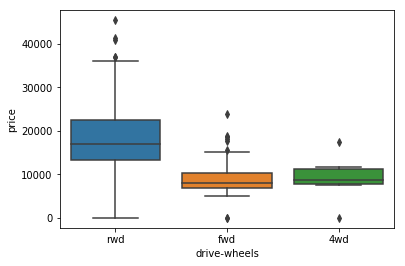

In [31]:
import seaborn as sns
sns.boxplot(x="drive-wheels",y="price", data=df)

Lo que se ve en el gráfico anterior es que la distribución de price en rwd (rear wheel drive) y en las otras categorías es bien diferente. Pero en fwd (front wheel drive) y en 4wd (4x4) son muy similares.  

Ahora vamos  a ver un gráfico de dispersión, para comparar dos variables/características y ver si existe algún tipo de correlación evidente.

Necesitamos pyplot (de matplotlib) para hacer los scatter plots.

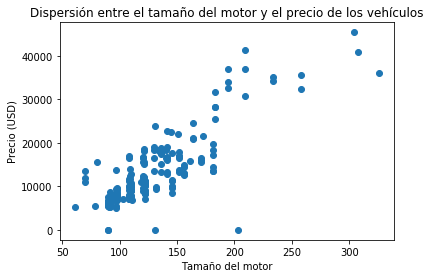

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df["engine-size"],df["price"])
plt.title('Dispersión entre el tamaño del motor y el precio de los vehículos')
plt.xlabel('Tamaño del motor')
plt.ylabel('Precio (USD)')
plt.show()


Según parece, hay una correlación lineal positiva entre estas dos variables

## Agrupamientos

Se puede usar groupby para agrupar columnas y mostrar algún valor agregado entre las columnas agrupadas, como ser el promedio, la suma, la cantidad, etc. En SQL, esto se hace todo el tiempo:

SELECT AVG(price) as price, drive-wheels, body-style
FROM cars
Group by drive-wheels, body-style

En Python, esto se puede hacer más o menos así...


In [44]:
#me hago una copia del df para laburar más prolijo
df_test = df[['drive-wheels','body-style','price']]

#agrupo por los columnas, a partir del promedio (mean)
df_grp = df_test.groupby([ 'drive-wheels','body-style'], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,3801.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9467.526316
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [43]:
df_grp.describe()

,price
count,13.000000
mean,13360.873729
std,6474.984408
min,3801.500000
25%,9095.750000
50%,11595.000000
75%,16994.222222
max,24202.714286


Para simplificar la lectura de la tabla df_grp, se puede transformar en una "pivot table", mostrando una variable en columnas, y el resto en filas. En caso que no exista un valor para una fila y columna determinada, se completa con NaN automáticamente

In [45]:
df_pivot = df_grp.pivot(index='drive-wheels',columns='body-style')

In [46]:
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Ya que estamos, vamos a visualizar estos datos como un mapa de calor (heatmap)

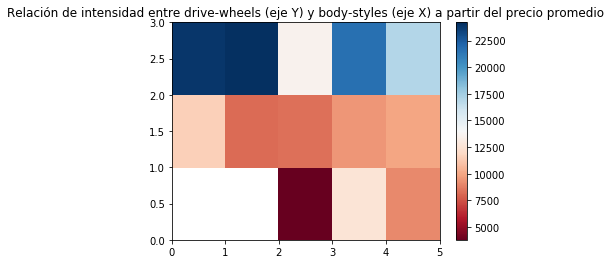

In [52]:
plt.pcolor(df_pivot,cmap="RdBu")  #RdBu significa: del red al blue
plt.colorbar()   #agregame una barra con las referencias
plt.title("Relación de intensidad entre drive-wheels (eje Y) y body-styles (eje X) a partir del precio promedio")
plt.show()

## Análisis de Varianza (ANOVA)

Con el análisis de varianza, podemos determinar si la variabilidad entre el promedio de dos grupos es mayor que la variabilidad dentro de cada grupo (f-test), y establecer un cierto valor de confianza (p) a esta correlación.

Por ejemplo, para hacer un ANOVA entre el precio y la marca:

In [57]:
import scipy.stats as stats #necesitamos la librería stats

df_anova = df[['price','make']] #separo las columnas con las que quiero trabajar
grouped_anova = df_anova.groupby(['make'])

In [58]:
df['make'].unique() #me fijo qué marcas hay en el dataset

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [61]:
anova_results_1 = stats.f_oneway( grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'] )
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

Obervar que el f-test score es menor a 1 y el valor de p es mayor a 0.5. Esto sugiere que los precios entre honda y subaru no son significativamente diferentes.

Vamos a probar con otro par de marcas

In [62]:
anova_results_2 = stats.f_oneway( grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')['price'] )
anova_results_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

El valor aquí del f-test es bien alto (400), con un p > 0.5

En gral. podemos afirmar que existe una correlación fuerte entre una variable categórica (ej. make) y